# 판다스 입문 _04 

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

# 전형적인 사례 앤스콤 4분할 그래프로 실습 

#### 앤스콤이 지적한 함정 
- 4개의 그룹  모든 그룹은 x, y열을 가지고 있음 
- 각 그룹은 평균, 분산과 수칫값이나 상관관계, 회귀선이 같다는 특징을 가짐 
- 데이터그룹 4그룹은 같은 데이터를 가질 수 있다라는 생각이 **함정**

- 각 데이터를 시각화하면 서로 다른 패턴을 가지고 있다는 것을 확인 가능

## 앤스콤 데이터 집합 불러온 후 그래프 그리기
- seaborn 라이브러리에 포함된 것을 불러와 작업

### 앤스콤 데이터 집합 불러오기 

In [1]:
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
anscombe = sns.load_dataset("anscombe")

In [3]:
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [4]:
# %matplotlib inline
# import matplotlib.pyplot as plt

In [5]:
dataset_1 = anscombe[anscombe['dataset']=='I']

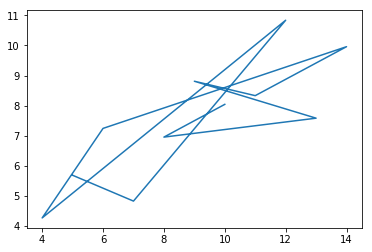

In [6]:
# 그래프 그리기
plt.plot(dataset_1['x'], dataset_1['y'])

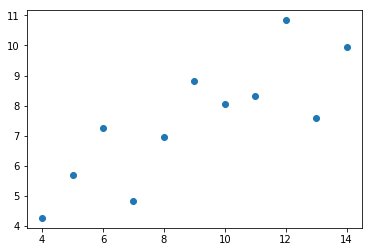

In [7]:
# 그래프 그리기 => 0 이아니라 o임
plt.plot(dataset_1['x'], dataset_1['y'],'o')

In [8]:
# 불린 추출  => 각 변수에 담는다 
dataset_2 = anscombe[anscombe['dataset']=='II']
dataset_3 = anscombe[anscombe['dataset']=='III']
dataset_4 = anscombe[anscombe['dataset']=='IV']

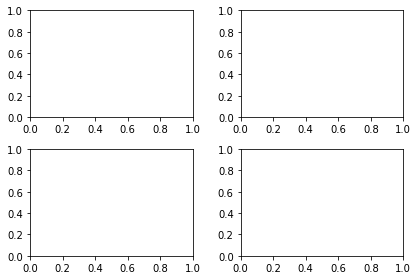

In [9]:
# 기본 틀 만들기 
fig = plt.figure()
# 그래프 격자를 그림
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

fig.tight_layout()

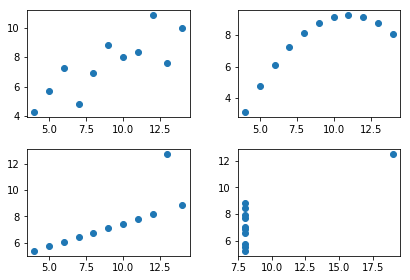

In [10]:
# 틀을 기반으로 그리기 , 점으로 
axes1.plot(dataset_1['x'], dataset_1['y'],'o')
axes2.plot(dataset_2['x'], dataset_2['y'],'o')
axes3.plot(dataset_3['x'], dataset_3['y'],'o')
axes4.plot(dataset_4['x'], dataset_4['y'],'o')

# 출력 
fig

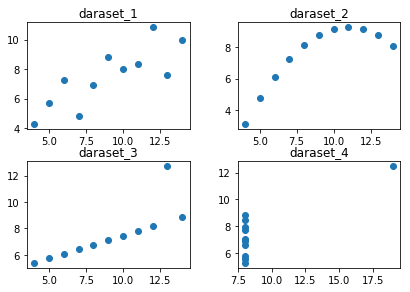

In [11]:
# 그래프이름 달기 = 타이틀달기  
axes1.set_title("daraset_1")
axes2.set_title("daraset_2")
axes3.set_title("daraset_3")
axes4.set_title("daraset_4")

# 출력 
fig

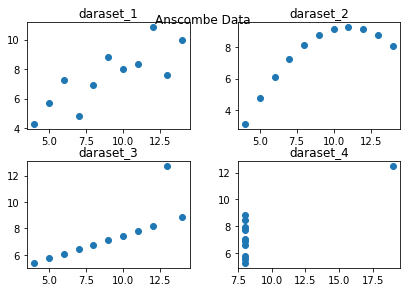

In [12]:
# 대타이틀 
fig.suptitle("Anscombe Data")

# 출력 
fig

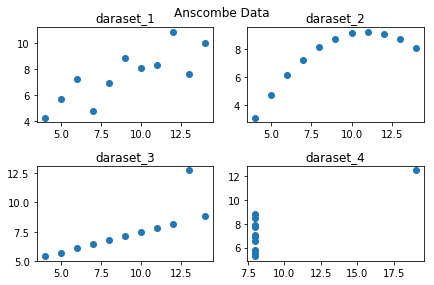

In [13]:
# 위그래프처럼 레이아웃을 조절하기위한 함수  
fig.tight_layout()

fig

### 기초 그래프 그리기 - 히스토그램, 산점도, 박스 그래프

In [14]:
tips = sns.load_dataset("tips")
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


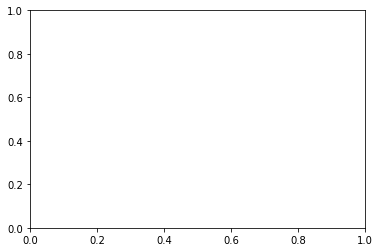

In [15]:
# 틀(fig) 만들기
fig = plt.figure()
# 두개는 한세트 
axes = fig.add_subplot(1,1,1)

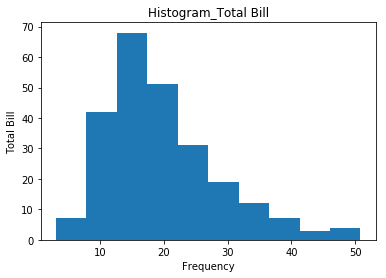

In [16]:
axes.hist(tips['total_bill'],bins=10)
axes.set_title('Histogram_Total Bill')
axes.set_xlabel('Frequency')
axes.set_ylabel('Total Bill')

#그래프로 출력 
fig

Text(0,0.5,'Tip')

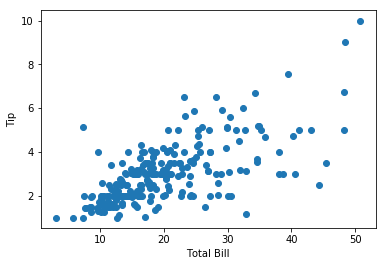

In [17]:
scatter_plot = plt.figure()
axes = scatter_plot.add_subplot(1,1,1)
axes.scatter(tips['total_bill'],tips['tip'])
axes.set_xlabel('Total Bill')
axes.set_ylabel('Tip')

Text(0.5,1,'Boxplot of Tips by Sex')

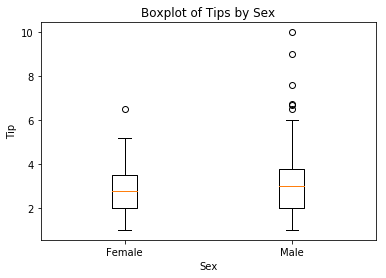

In [18]:
boxplot = plt.figure()
axes = boxplot.add_subplot(1,1,1)

axes.boxplot(
    [tips[tips['sex']=='Female']['tip'],
    tips[tips['sex'] == 'Male']['tip']],
    labels = ['Female','Male'])

axes.set_xlabel('Sex')
axes.set_ylabel('Tip')
axes.set_title('Boxplot of Tips by Sex')

## 다변량 데이터로 다변량 그래프 그리기(산점도)

In [19]:
# 성별을 새 변수로 추가 
# 문자열은 산점도 그래프의 색상을 지정하는 값을 사용 x 
# 문자열을 정수로 치환하는 메소드가 필요 
def recode_sex(sex):
    if sex == 'Female':
        return 0 
    else:
         return 1 

In [20]:
#  메소드가 반환한 값(0,1)을 sex_color 열을 새로 생성하여 추가 
tips['sex_color'] = tips['sex'].apply(recode_sex)
# 브로드캐스팅을 위한 apply => 지금은 안 중요

Text(0,0.5,'Tip')

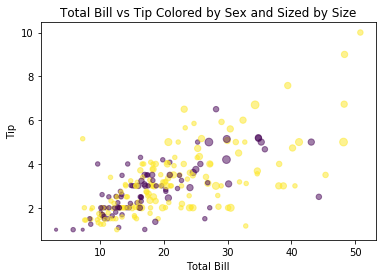

In [21]:
# 인원수 산점도 그래프에 추가 => 테이블당 인원수는 점의 크기로 표현 
# s,c 인자 값으로 성별의 치환값을 전달 함 
scatter_plot = plt.figure()
axes = scatter_plot.add_subplot(1, 1, 1)
axes.scatter(
    x = tips['total_bill'],
    y = tips['tip'],
    s = tips['size']*10,
    c = tips['sex_color'],
    alpha = 0.5 )
    # 점의 투명도 =>  alpha = 0.5

axes.set_title('Total Bill vs Tip Colored by Sex and Sized by Size') 
axes.set_xlabel('Total Bill') 
axes.set_ylabel('Tip')

## 단변랑 그래프 그리기(히스토그램 )
- 라이브러리 자체를 이용해서 작업 
- seaborn을 이용하면 멧폴렛 보다 화려한 그래프를 그릴수 있음 

In [22]:
import seaborn as sns

In [23]:
tips = sns.load_dataset("tips")

C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Total Bill Histogram with Density Plot')

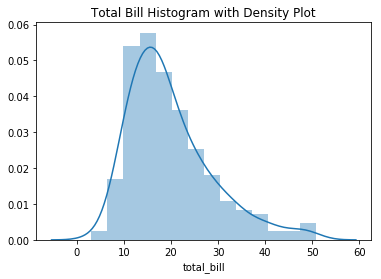

In [24]:
# subplot,distplot메서드 사용 
# subplot으로 틀을 만들고 ,distplot로 total_bill열 데이터를 전달하면 끝 

ax = plt.subplot()
ax = sns.distplot(tips['total_bill'])
# 빅 타이틀 
ax.set_title('Total Bill Histogram with Density Plot')

C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

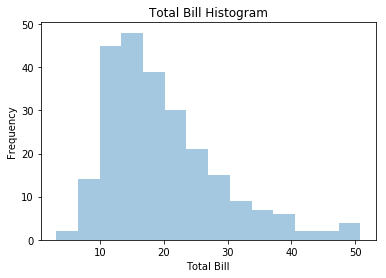

In [25]:
# distplot을 사용하면 히스토 그램과 밀집도 그래프를 같이 그림
# 만약 밀집도 그래프를 제외하고 싶으면 인자 값으로 kde = False 설정 
ax = plt.subplot()
ax = sns.distplot(tips['total_bill'], kde=False)
# 빅 타이틀 
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Unit Probability')

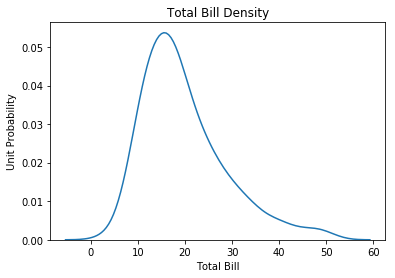

In [26]:
# 밀집도 그래프만 나타내려면 hist인자를 False
ax = plt.subplots() 
ax = sns.distplot(tips['total_bill'], hist=False) 
ax.set_title('Total Bill Density') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Unit Probability')

C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Total Bill')

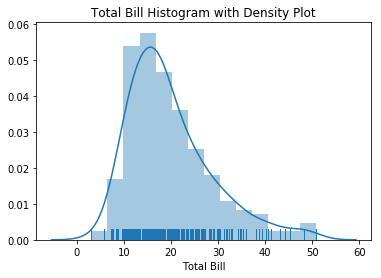

In [27]:
# 데이터 시각화를 더 효율적으로 하기위해 여러 그래프를 한번에  출력 
# 히스토그램과 밀집도를 그리는 displot메서드에 rug인자를 추가 양탄자(rug)그래프까지 그림
hist_den_rug, ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)

# 빅 타이틀 
ax.set_title('Total Bill Histogram with Density Plot')
ax.set_xlabel('Total Bill')

Text(0,0.5,'Frequency')

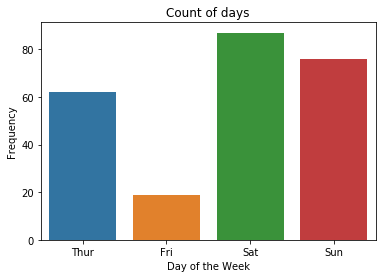

In [28]:
# count 그래프 => 이산값을 나타낸 그래프 
# countplot 메서드메 tips 데이터프레임의 day열을 추가해 count그래프 생성 
ax = plt.subplots() 
ax = sns.countplot('day', data=tips) 

ax.set_title('Count of days') 
ax.set_xlabel('Day of the Week') 
ax.set_ylabel('Frequency')

## 다양한 종류의 이변량 그래프 그리기

### seaborn 라이브러리로 산점도 그래프 그리기
- matplotlib 라이브러리보다 보다 다양한 방법으로 산점도 그래프를 그릴 수 있음 
- 그러기 위해서는 regplot메서드를 사용해야함 
- regplot는 산점도 그래프, 회귀선을 함께 그릴수 있음 

C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Tip')

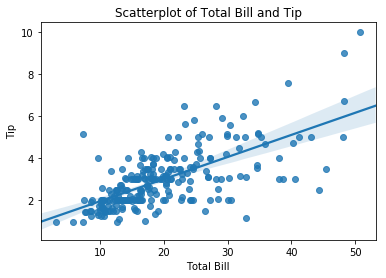

In [29]:
# 회귀선 추가 
ax = plt.subplots() 
ax = sns.regplot(x='total_bill', y='tip', data=tips) 

ax.set_title('Scatterplot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip')

Text(0,0.5,'Tip')

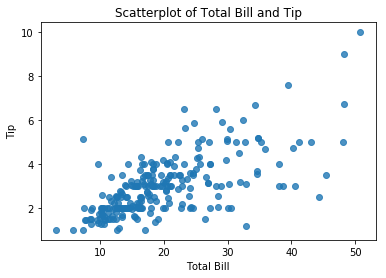

In [30]:
# fit_reg 인자를 False로 지정 
ax = plt.subplots() 
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg = False) 

ax.set_title('Scatterplot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip')

C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1.03,'Joint Plot of Total Bill and Tip')

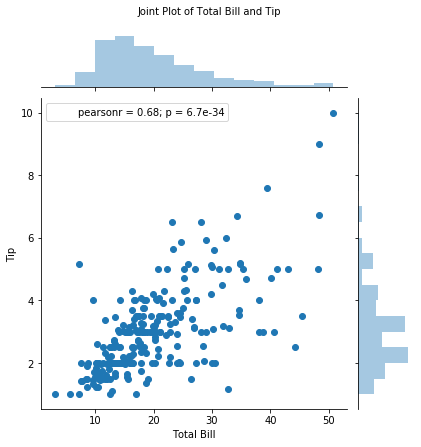

In [31]:
# jointplot 사용 
joint = sns.jointplot(x='total_bill',y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
# 타이틀 
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

In [32]:
# 산점도의 단점은 점이 겹쳐 보일 경우 점을 구분하기 어렵다는 것 
# 산점도를 보다 쉽게 구분하기 쉽게 하려면 육각 그래프를 이용 

C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1.03,'Hexbin Joint Plot of Total Bill and Tip')

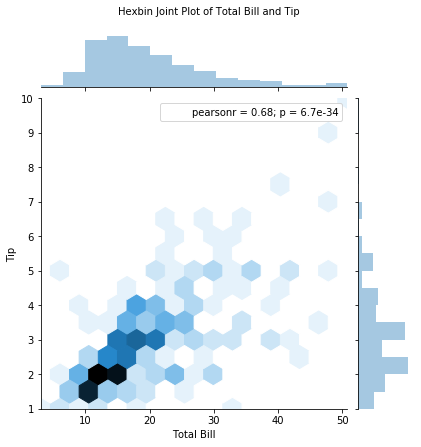

In [33]:
# 완전 이쁨
# jointplot을 똑같이 사용하는데 kind만 hex로 지정 
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03 )

### 이차원 밀집도 
- kdeplot 메소드 이용 total_bill, tip열을 전달하여 이차원 밀집도를 그림 

C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Tip')

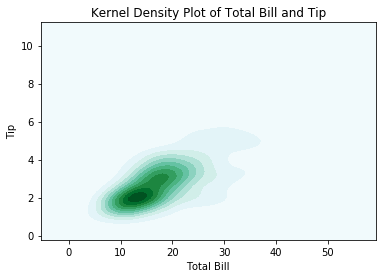

In [34]:
# shade 인자값을  True로 지정 => 그래프의 음영 효과를 줄 수 있음 
kde, ax = plt.subplots() 
ax = sns.kdeplot(data=tips['total_bill'],
                 data2=tips['tip'], 
                 shade=True)

ax.set_title('Kernel Density Plot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip')

### 바 그래프그리기
- 지정한 변수의 평균을 계산하여 그릴 수 있음 

C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Average total bill')

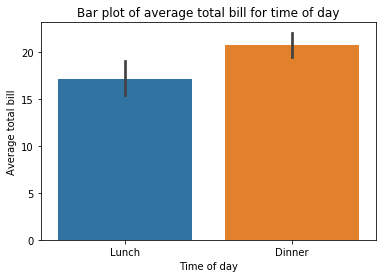

In [35]:
ax = plt.subplot()
ax = sns.barplot(x='time',y='total_bill', data = tips)

ax.set_title('Bar plot of average total bill for time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Average total bill')

### 박스 그래프 그리기 
- 박스 그래프는 최솟값, 1분위수, 중간값, 3분위수, 최대값, 이상치 등 다양한 통계량을 한번에 표현  

Text(0,0.5,'Total Bill')

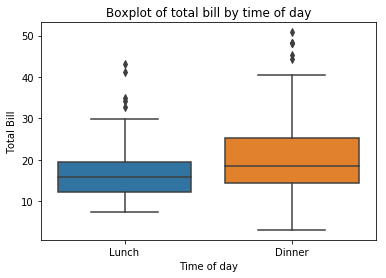

In [36]:
ax = plt.subplot()
ax = sns.boxplot(x='time',y='total_bill', data = tips)

ax.set_title('Boxplot of total bill by time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Total Bill')

C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Total Bill')

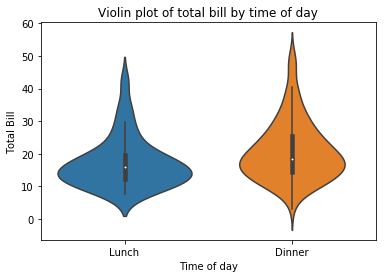

In [37]:
# 바이올린 그래프 
ax = plt.subplot()
ax = sns.violinplot(x='time',y='total_bill', data = tips)

ax.set_title('Violin plot of total bill by time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Total Bill')

# 테스트 필요 !!!! 
- 관계 그래프 

### 관계 그래프 

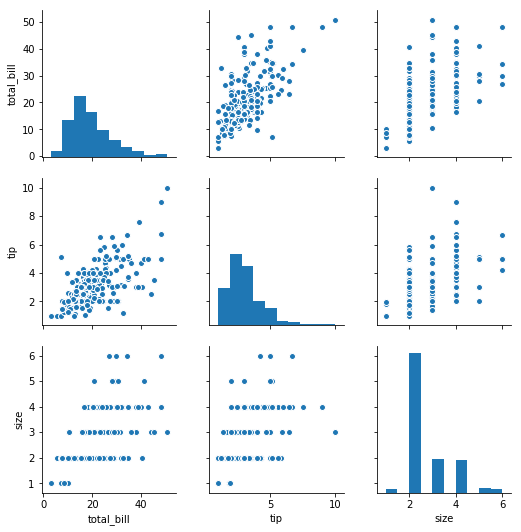

In [38]:
# 그래프의 종합 => 관계그래프 

fig = sns.pairplot(tips)

- 중복된 그래프 정보가 노출 => 단점 
- 대각선 기준으로 위아래를 나누어 수정 가능 

- map_upper :위 
- map_lower : 아래 
- map_diag  : 대각선을 중심으로 그래프를 그림 

C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\JerryKim\AppDat

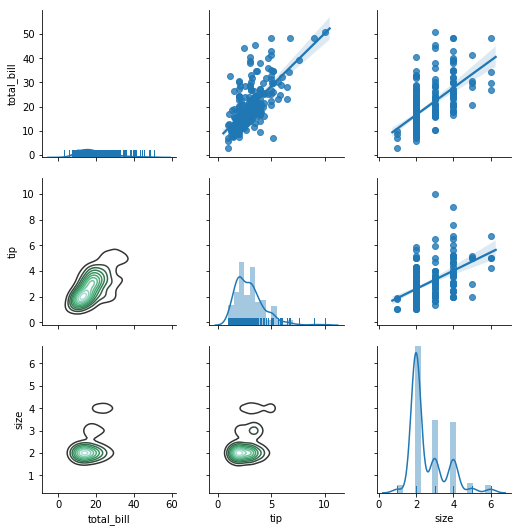

In [39]:
pair_grid = sns.PairGrid(tips) 
pair_grid = pair_grid.map_upper(sns.regplot) 
pair_grid = pair_grid.map_lower(sns.kdeplot) 
pair_grid = pair_grid.map_diag(sns.distplot, rug=True) 

plt.show()

## 다변량 그래프 

### seaborn 라이브러리로 바이올린 그래프 그리기

C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


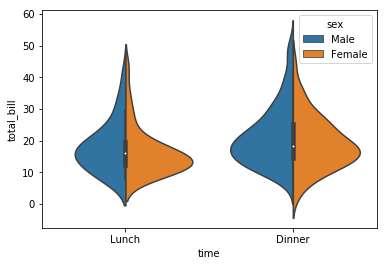

In [40]:
# 바이올린 그래프 - 색상추가
violin,ax = plt.subplots()
ax = sns.violinplot(x='time',y='total_bill', hue='sex', data=tips, split=True )

plt.show()

### 산점도 , 관계 그래프 그리기

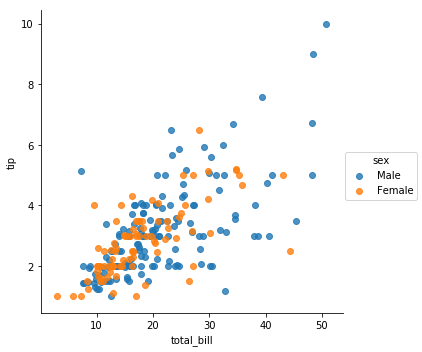

In [41]:
# 색상 추가 
scatter = sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex', fit_reg=False)
plt.show()

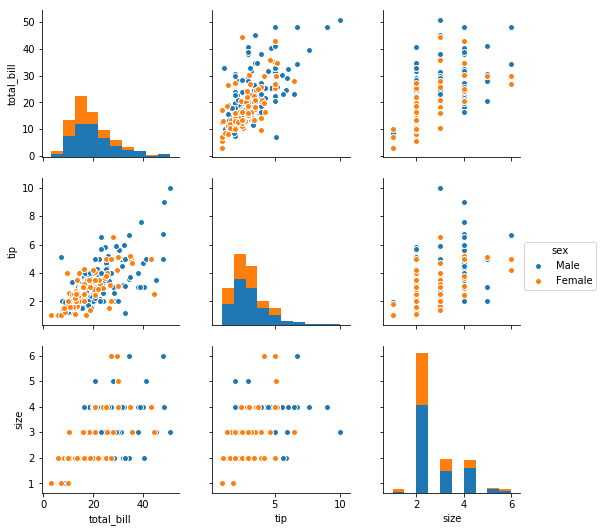

In [42]:
fig = sns.pairplot(tips,hue='sex')

### 산점도 그래프의 크기와 모양 조절

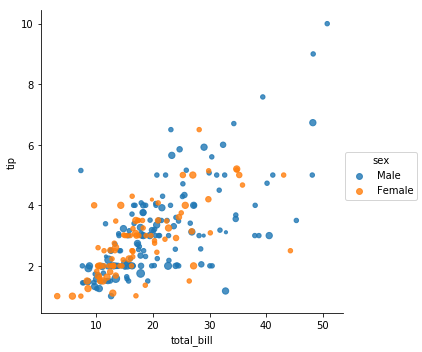

In [43]:
# 산점도 그래프의 크기와 모양 조절 
# scatter_kws 인자  딕셔너리 형태로 인잣값을 전달 
scatter = sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex', fit_reg=False, scatter_kws={'s':tips['size']*10})

plt.show()

### 마커 설명 
https://matplotlib.org/api/markers_api.html

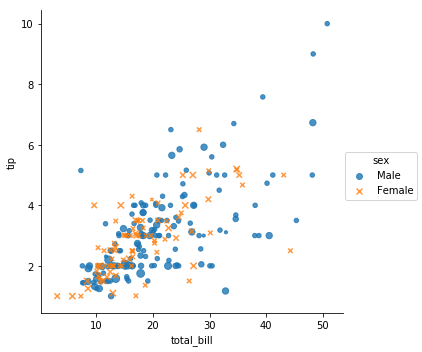

In [44]:
# 그래프의 점을 다른기호르 쓰고자 한다면 markers를 수정 
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', markers=['o', 'x'], scatter_kws={'s': tips['size']*10}) 

plt.show()

### lmplot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기

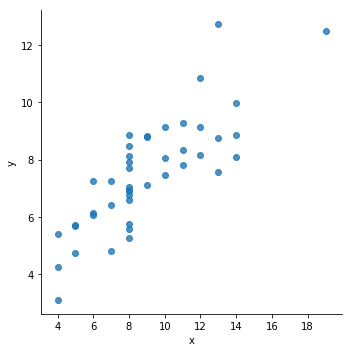

In [45]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False )

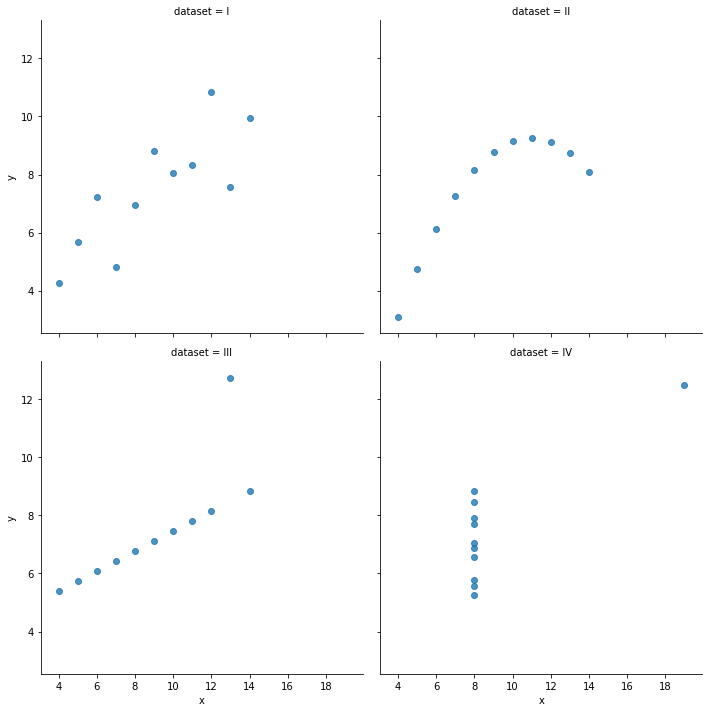

In [46]:
# col_wrap 값을 조정 가능 
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False, col='dataset', col_wrap=2 )

### FacetGrid 클래스로도 그룹별 그래프
- 함수로 간단하게 그릴수 있음 
- 다변량 그래프도 가능 

C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


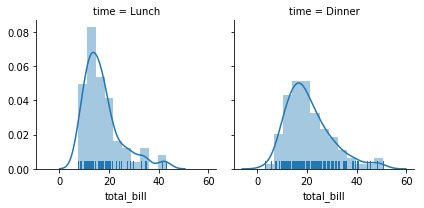

In [47]:
facet = sns.FacetGrid(tips, col='time') 
facet.map(sns.distplot, 'total_bill', rug=True)

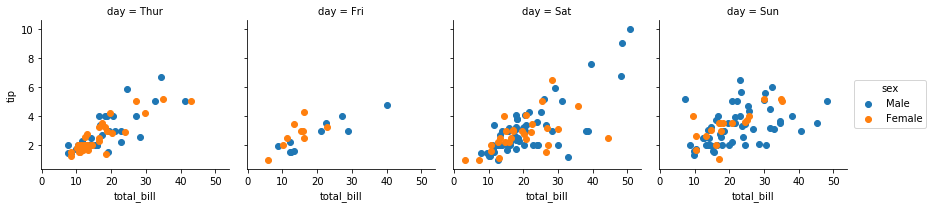

In [48]:
facet = sns.FacetGrid(tips, col='day', hue='sex') 
facet = facet.map(plt.scatter, 'total_bill', 'tip') 
facet = facet.add_legend()

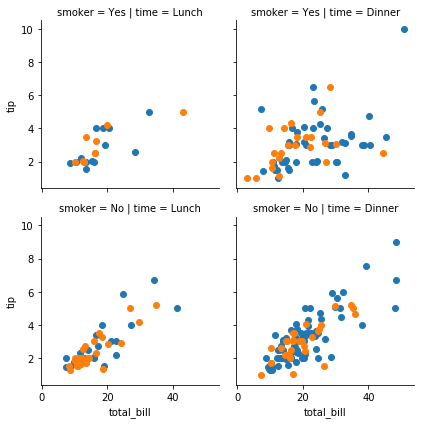

In [49]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex') 
facet.map(plt.scatter, 'total_bill', 'tip')

---

### 데이터프레임과 시리즈로 그래프 그리기

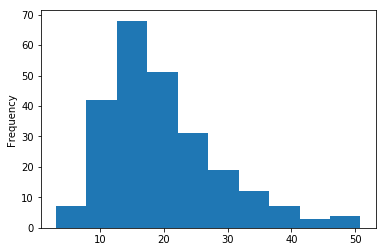

In [50]:
fig, ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

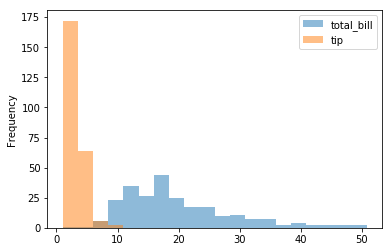

In [51]:
# 투명도 조절 -> hist메서드의 alpha=0.5(투명도),bins=20(x축 간격), ax=ax 인자 사용 
fig, ax = plt.subplots()
ax = tips[['total_bill','tip']].plot.hist(alpha=0.5,bins=20, ax=ax)

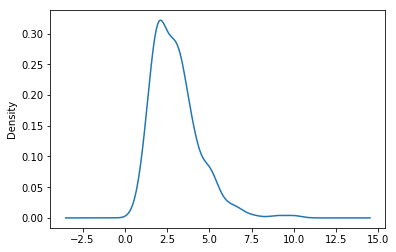

In [52]:
fig, ax = plt.subplots()
ax = tips['tip'].plot.kde()

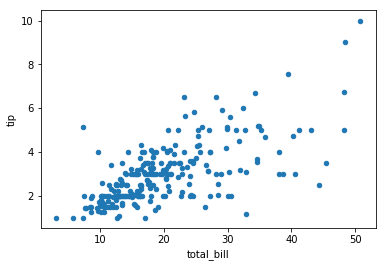

In [53]:
fig, ax = plt.subplots()
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax)

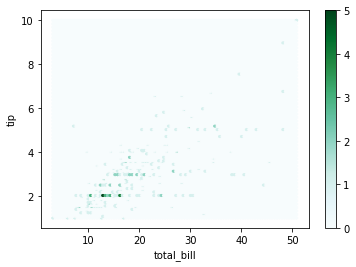

In [54]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', ax=ax)

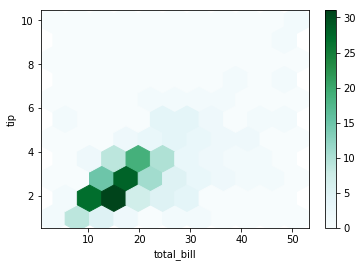

In [55]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize=10,ax=ax)

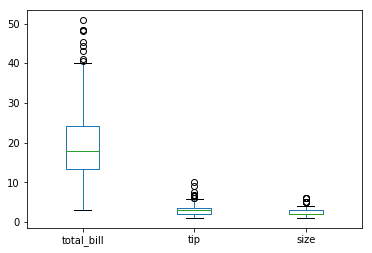

In [56]:
fig, ax =plt.subplots()
ax = tips.plot.box(ax=ax)

### 그래프에 스타일 적용하기
- set_style메서드를 이용해서 변경 가능 
- 적용할 부분에 한번만 실행 

C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


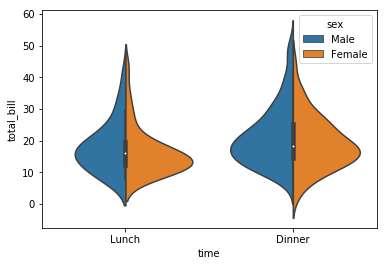

In [57]:
fig, ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


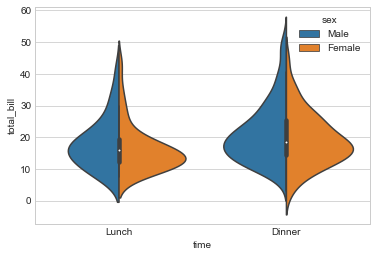

In [58]:
sns.set_style('whitegrid')
fig, ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


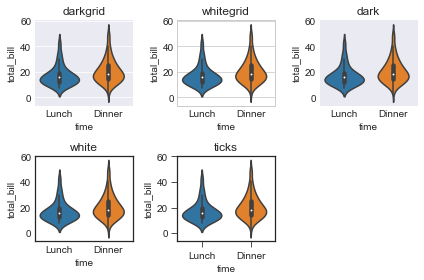

In [63]:
fig = plt.figure()
seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
# for문을 이용해서 모든 스타일을 하나하나 적용한 그래프
for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1 # 그래프 개수
#     print(plot_position)

    with sns.axes_style(style):
        ax = fig.add_subplot(2,3,plot_position)
        violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
        violin.set_title(style) 
        
fig.tight_layout()

# 데이터 시각화
- 데이터를 분석하기 위해서 반드시 알아야하는 중요한 요소 